# Código Heart Failure

## Importações

### Pip install

Instalações !pip para algumas bibliotecas.

Sweetviz para uma análise rápida do dataset e Joblib para salvar os parâmetros e treino do modelo.

In [ ]:
!pip install sweetviz
!pip install joblib

### Import

In [ ]:
import timeit
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import tensorflow as tf
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras import metrics
from sklearn.svm import SVC
from tensorflow import keras
from sklearn.metrics import *
from keras.optimizers import *
from tensorflow.keras import layers
from tensorflow.keras import backend
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#import isolado para não causar erro
import joblib

### Download do dataframe

Dataframe pego do site kaggle e feito upload no github para melhor eficiência no download do arquivo csv.

https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RF3758/K37PjOgE53/main/corazonfail.csv", sep=',',decimal='.', encoding = 'ISO-8859-1')

Variáveis:

Age: Idade em anos [years]

Sex: Sexo biológico [M: Male, F: Female]

ChestPainType: tTpo de dor no peito [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: Pressão sanguínea em repouso [mm Hg]

Cholesterol: Colesterol sérico [mm/dl]

FastingBS: Açúcar no sangue em jejum [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: Resultados de eletrocardiograma em repouso [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: Frequência cardíaca máxima alcançada [Numeric value between 60 and 202]

ExerciseAngina: Angina induzida por exercício [Y: Yes, N: No]

Oldpeak: Depressão ST de repouso em exercício relativo [Numeric value measured in depression]

ST_Slope: Inclinação do segmento ST de pico do exercício [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Classe de saída [1: heart disease, 0: Normal]

## Análise exploratória no dataset

### Análise exploratória pelo SweetVIZ

In [ ]:
analise_sv = sv.analyze(dataset)

                                             |          | [  0%]   00:00 -> (? left)

A análise feita no SweetVIZ é composta por "abas" que são as colunas no dataset. Ele informa o tipo de dado se é float, int ou string mostrando tipos de características para cada dytpe.

As informações dadas nas análises incluem dados em gráficos de quantidade de variáveis, relação entre variáveis ao clicar na aba como também menores e maiores valores, dados estatísticos como média e outros tipos. Na opção "ASSOCIATIONS" na área de dados gerais do dataframe, mostra um tipo de matriz de confusão entre os dados do dataset.


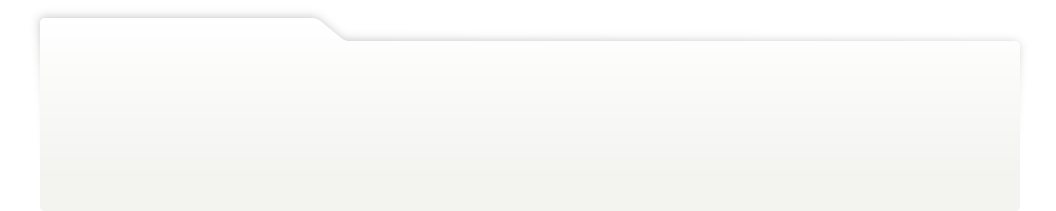
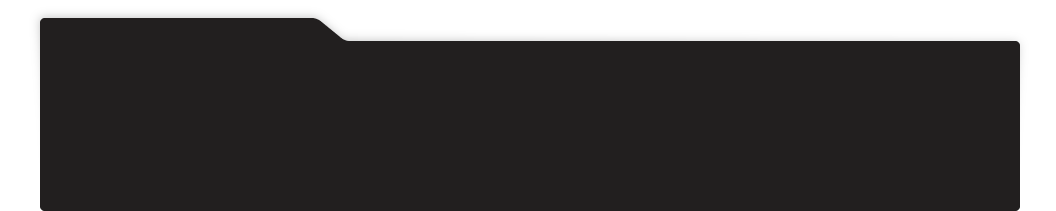
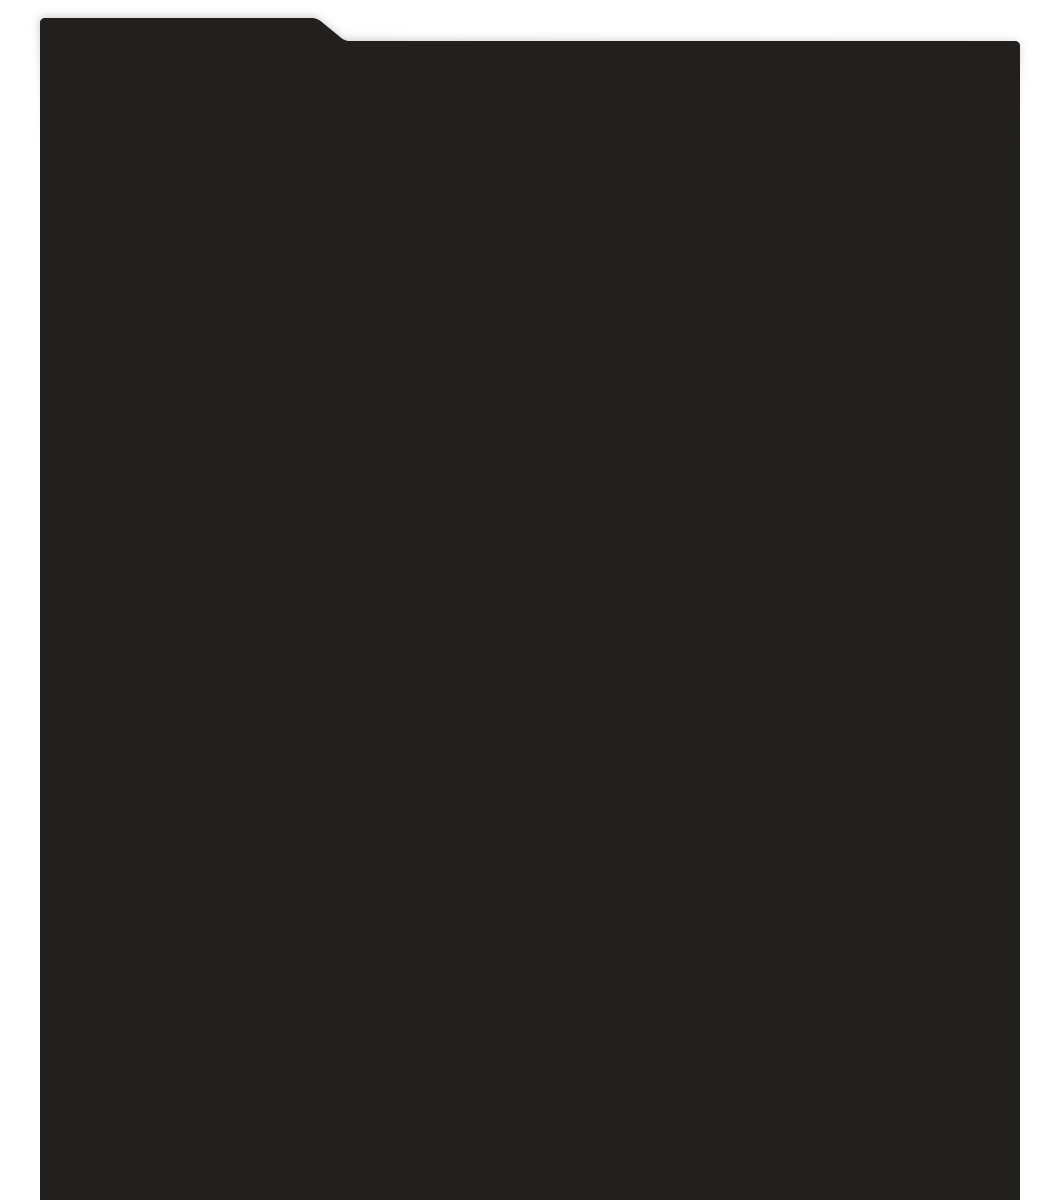
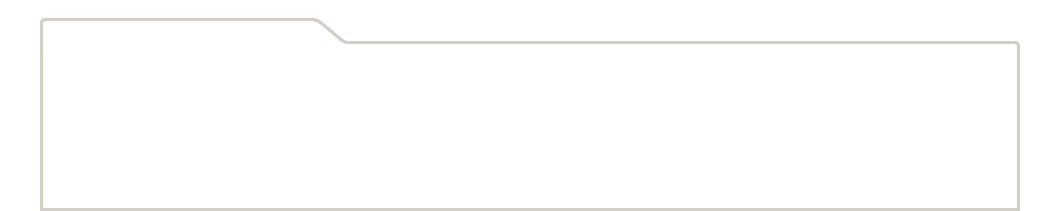
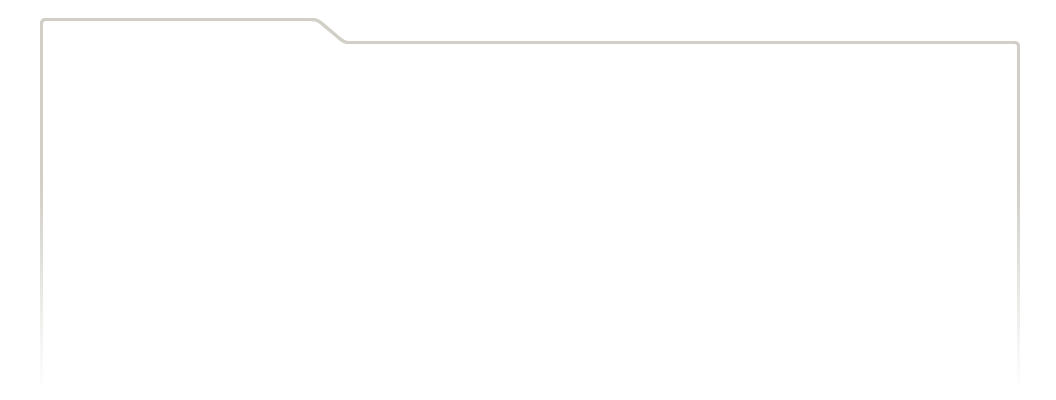
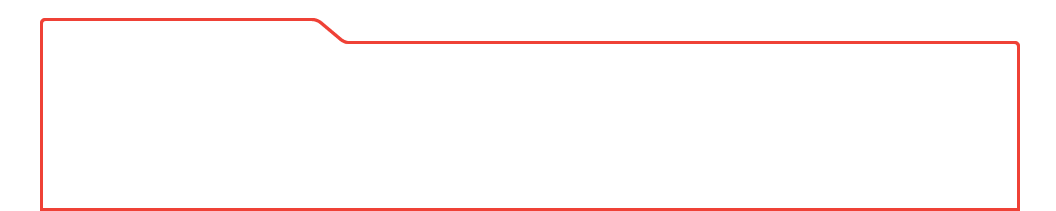
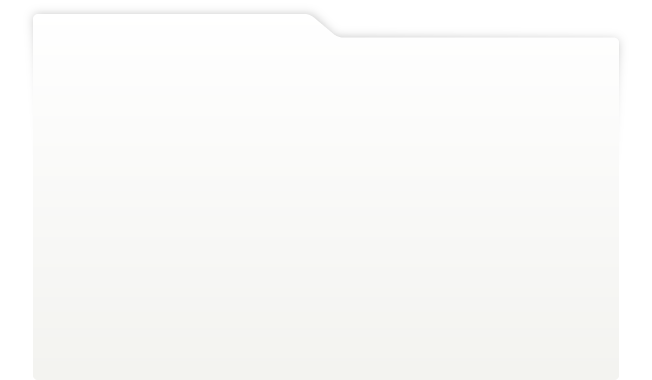
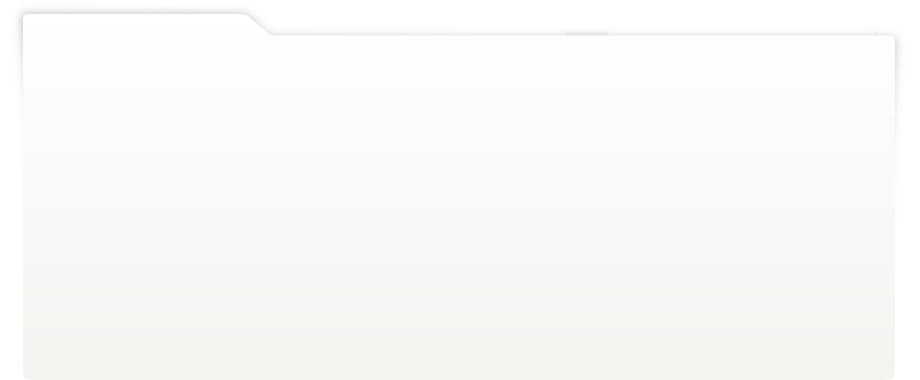
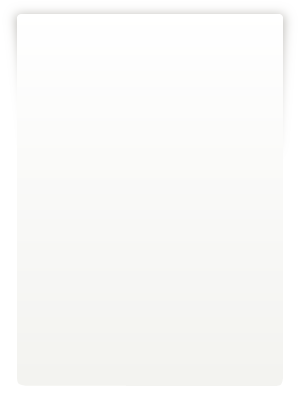
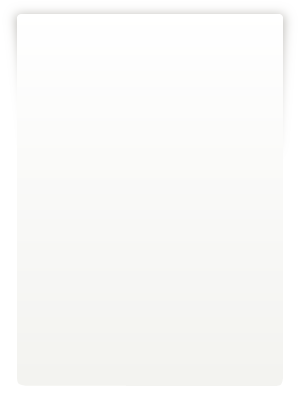
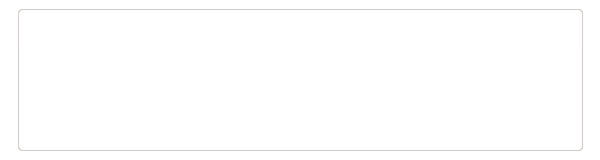
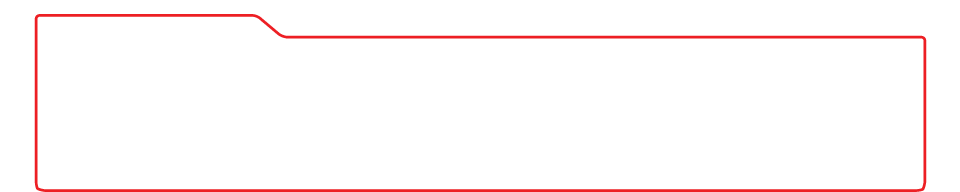
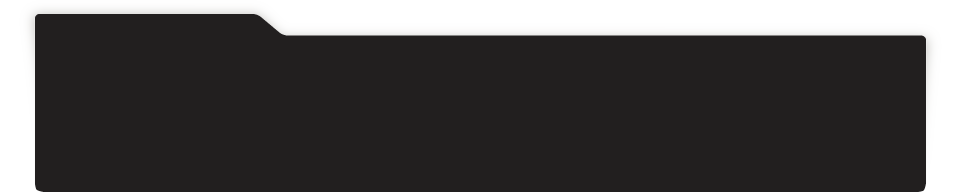
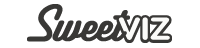
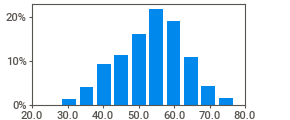
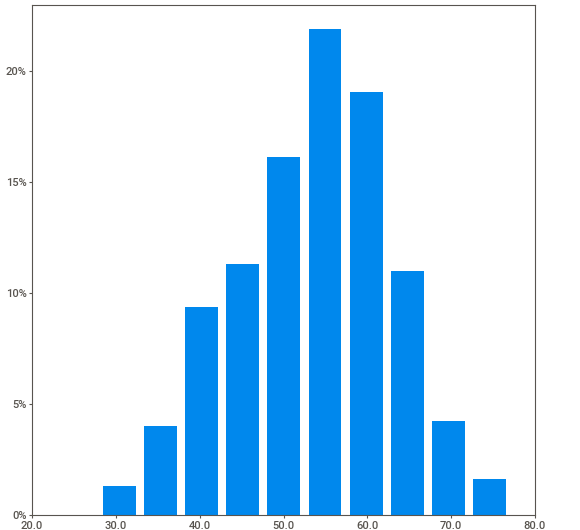
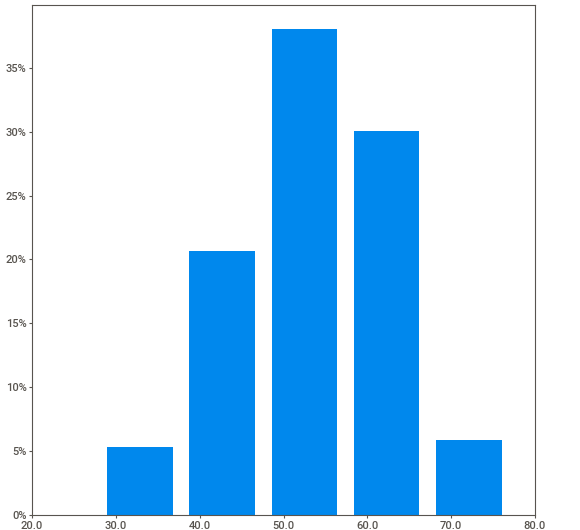
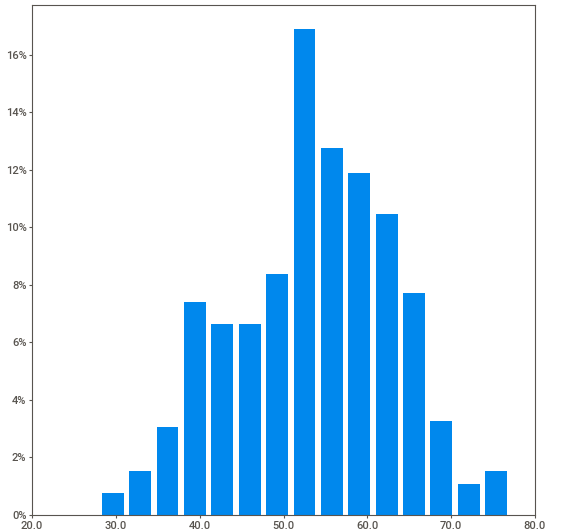
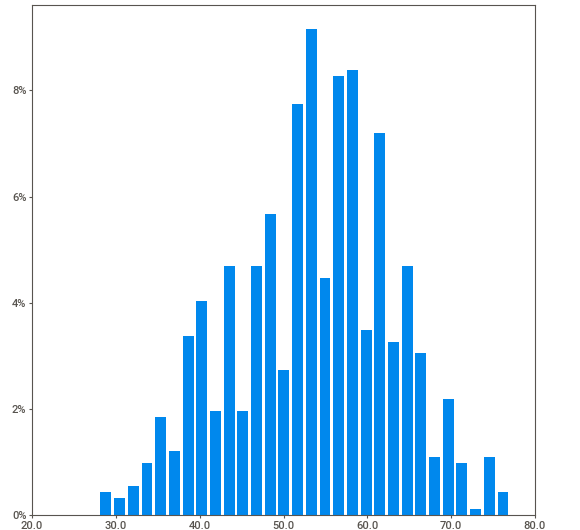
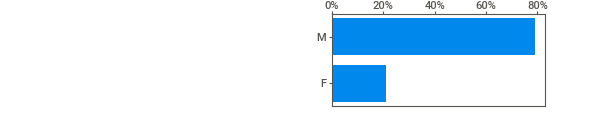
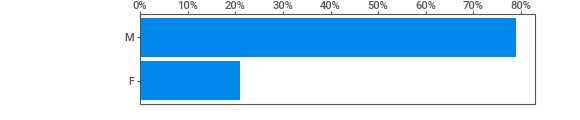
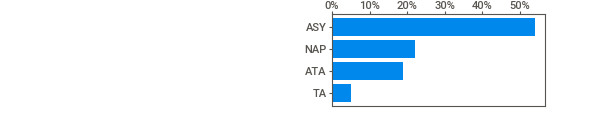
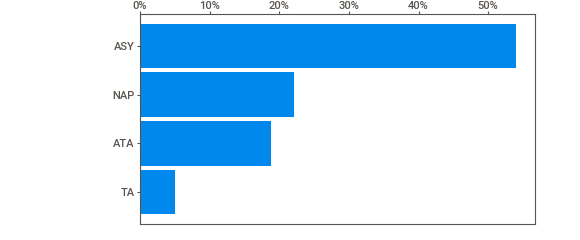
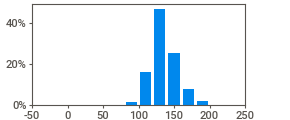
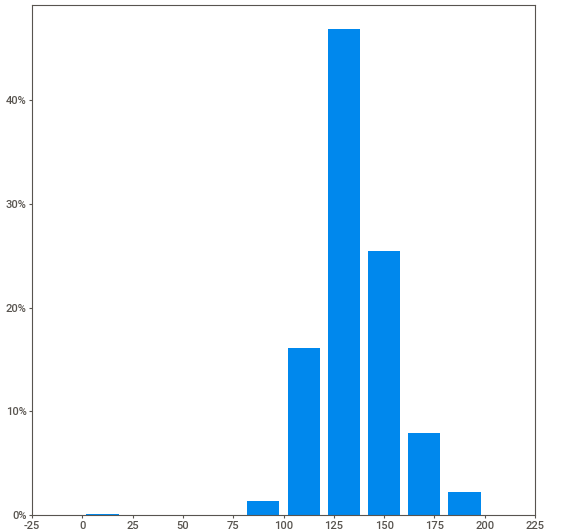
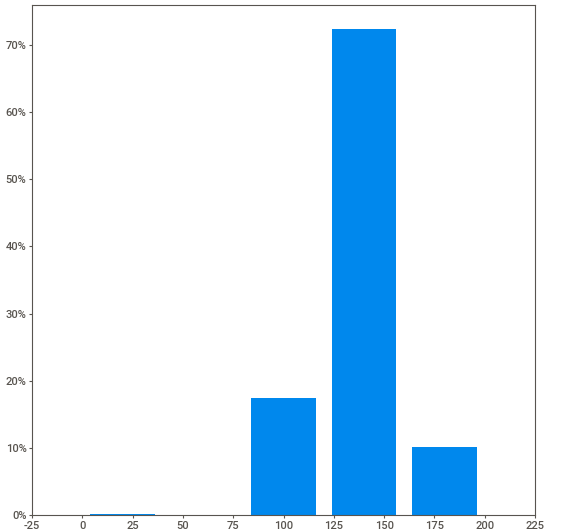
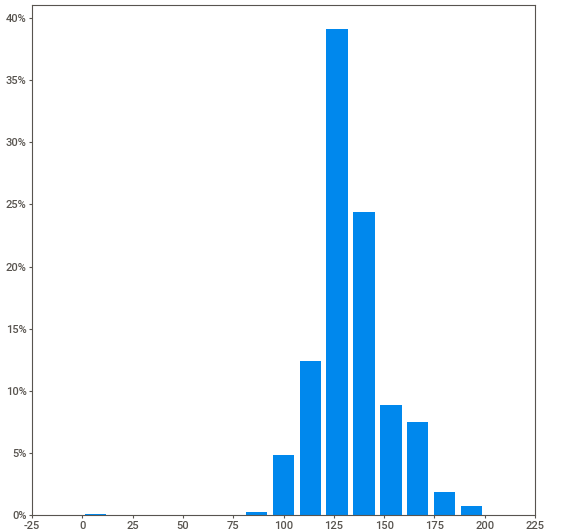
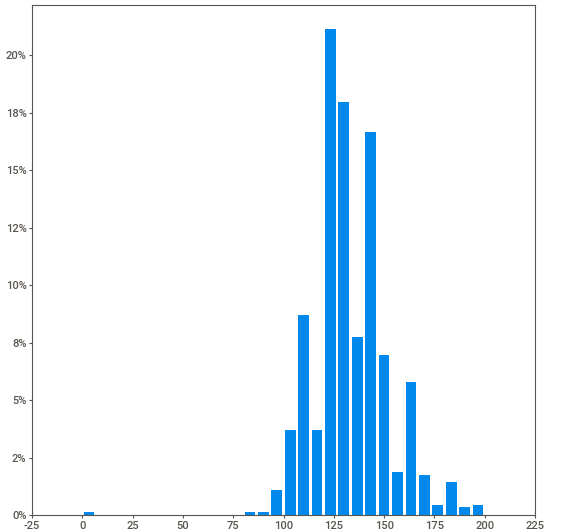
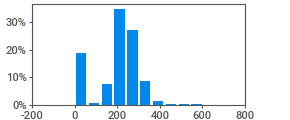
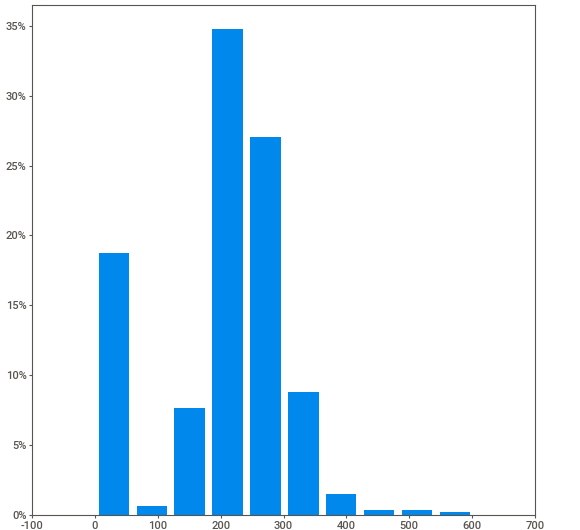
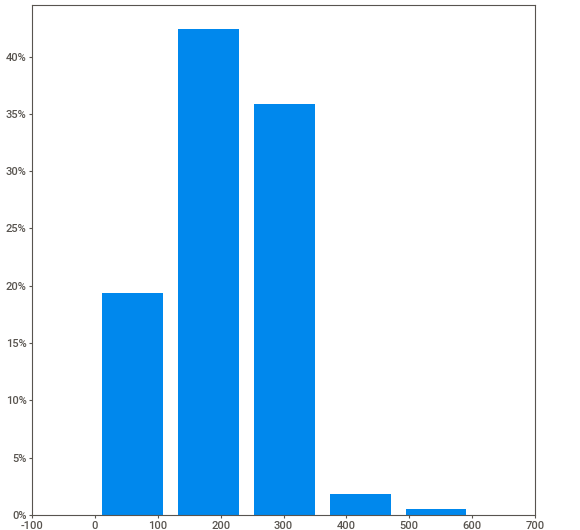
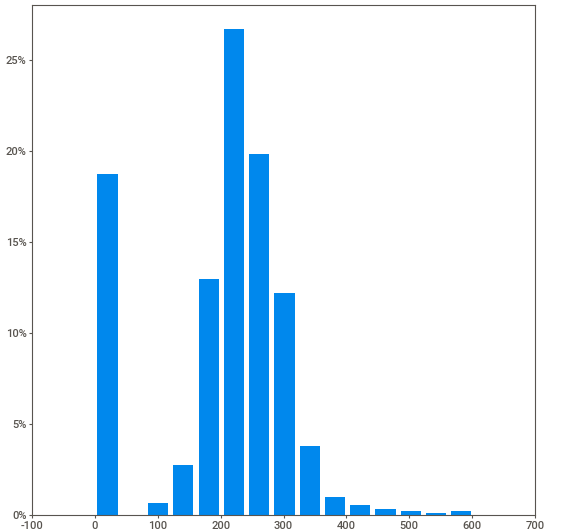
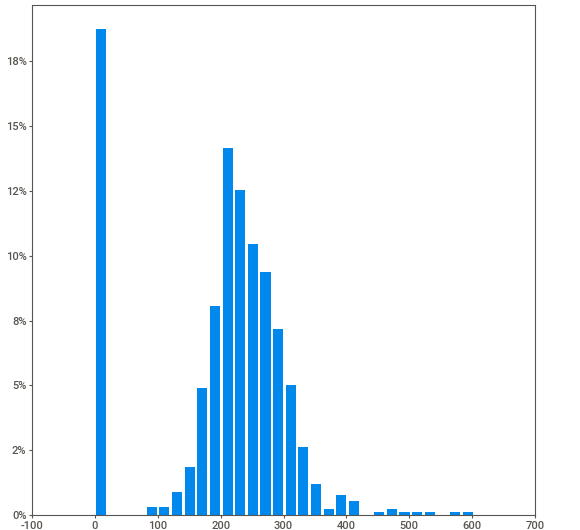
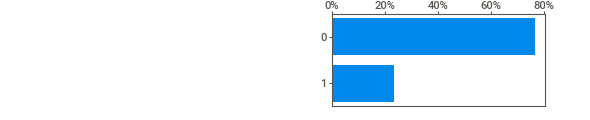
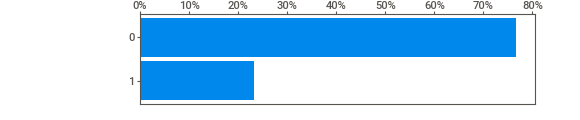
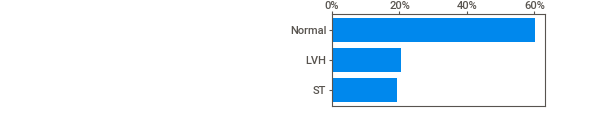
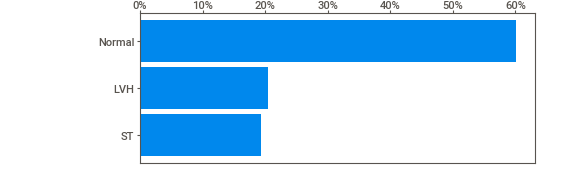
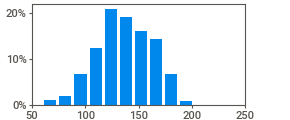
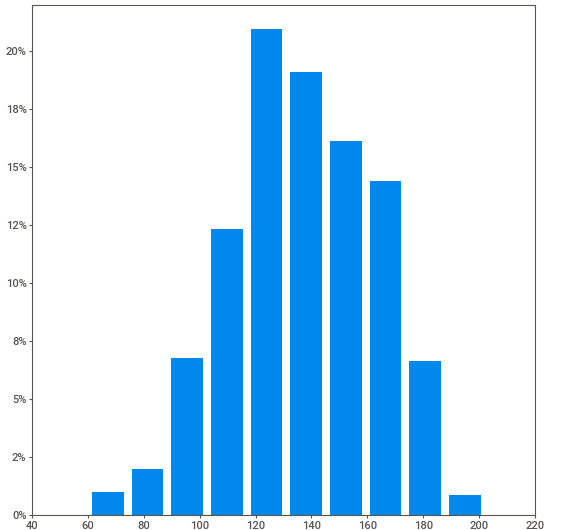
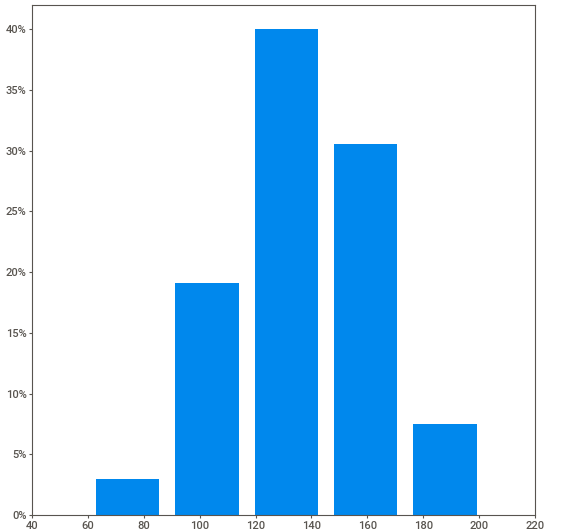
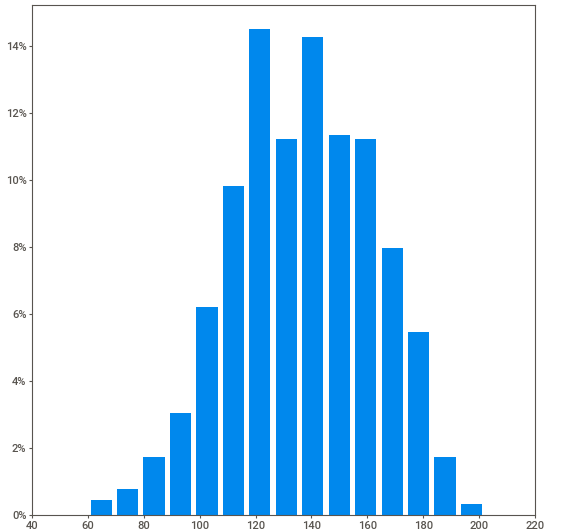
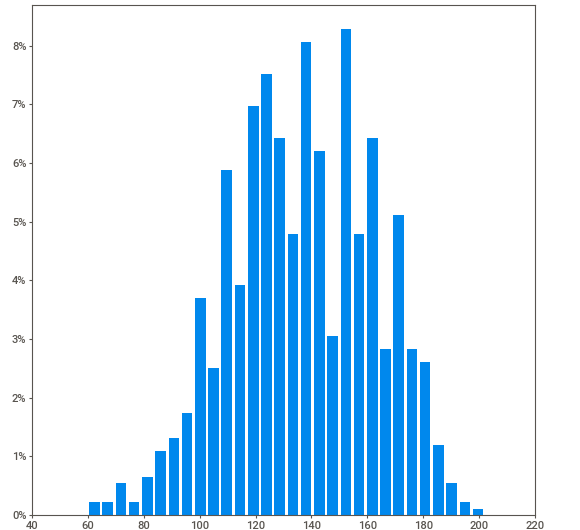
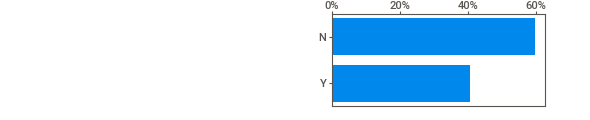
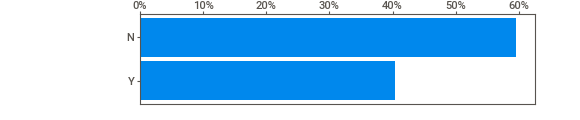
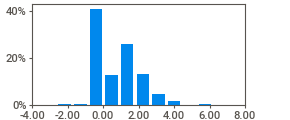
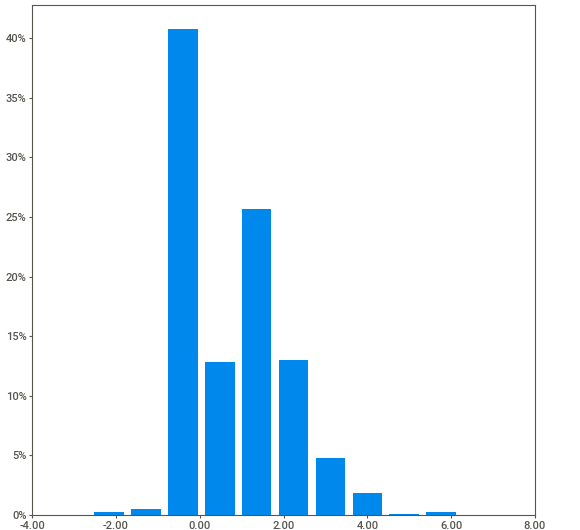
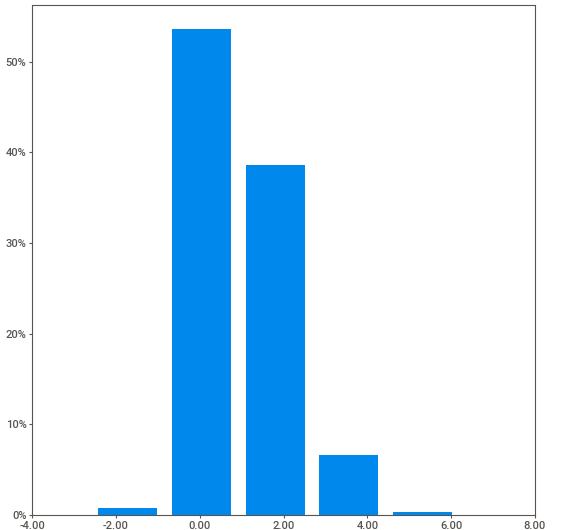
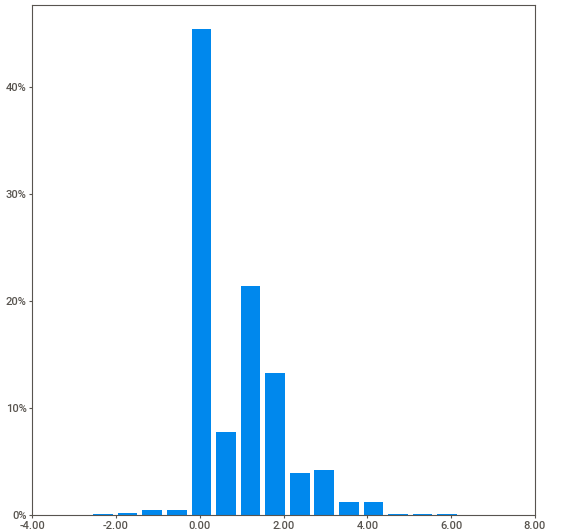
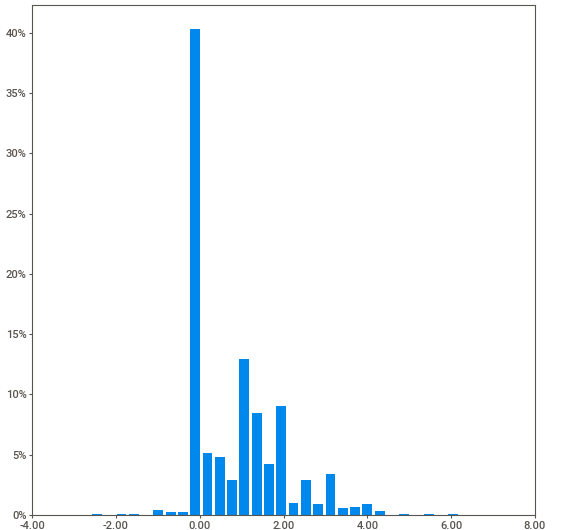
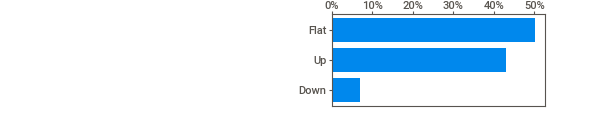
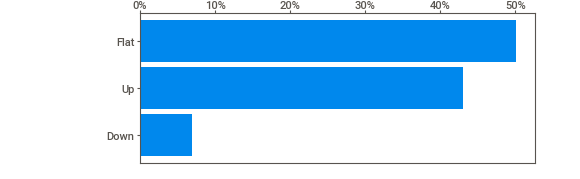
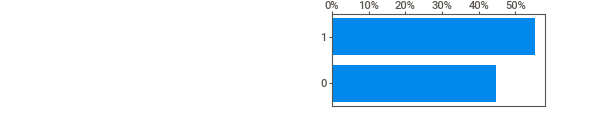
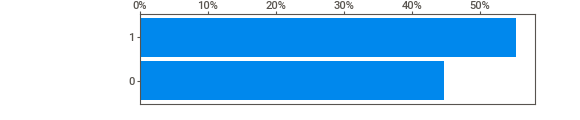
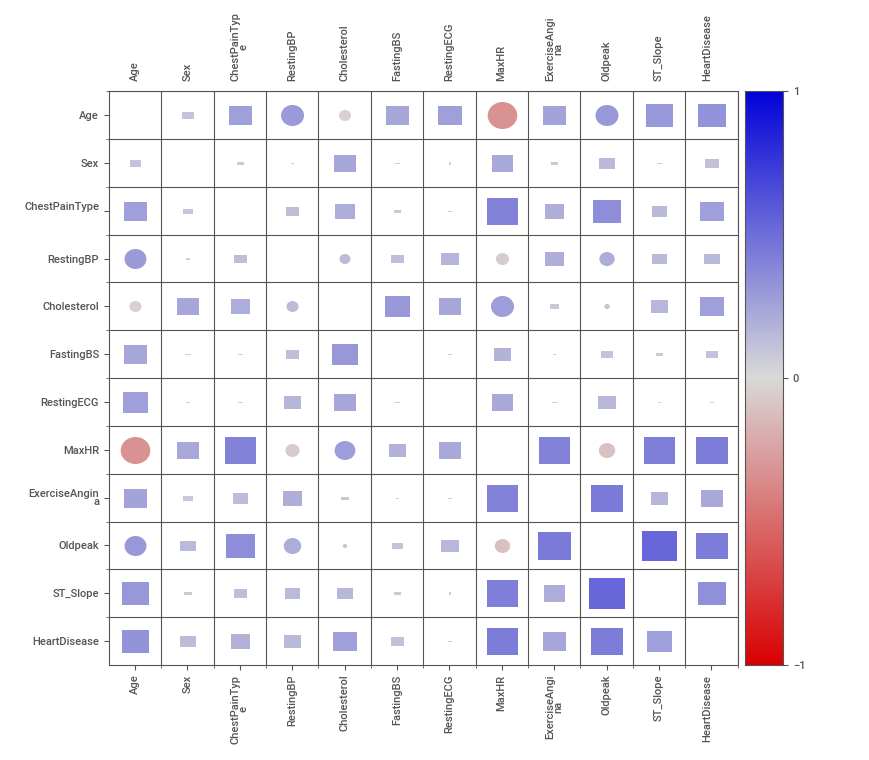
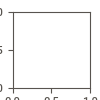

In [ ]:
analise_sv.show_notebook()

### Análise exploratória por funções pandas

In [ ]:
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
dataset.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [ ]:
#.T gera uma matriz invertida na grade de dados
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Análise dos dados para substituição

In [ ]:
print('FastingBS',dataset['FastingBS'].unique())
print('HeartDisease',dataset['HeartDisease'].unique())
print('Sex',dataset['Sex'].unique())
print('ExerciseAngina',dataset['ExerciseAngina'].unique())
print('ST_Slope',dataset['ST_Slope'].unique())
print('RestingECG',dataset['RestingECG'].unique())
print('ChestPainType',dataset['ChestPainType'].unique())

FastingBS [0 1]
HeartDisease [0 1]
Sex ['M' 'F']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']
RestingECG ['Normal' 'ST' 'LVH']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']


In [ ]:
dataset = dataset.astype({'Sex' : 'string'})
dataset = dataset.astype({'ChestPainType' : 'string'})
dataset = dataset.astype({'RestingECG' : 'string'})
dataset = dataset.astype({'ExerciseAngina' : 'string'})
dataset = dataset.astype({'ST_Slope' : 'string'})
dataset = dataset.astype({'FastingBS' : 'string'})
#dataset = dataset.astype({'HeartDisease' : 'string'})

In [ ]:
dataset['Sex'] = dataset['Sex'].replace(['M','F'],['1','2'])
dataset['FastingBS'] = dataset['FastingBS'].replace(['0','1'],['1','2'])
#dataset['HeartDisease'] = dataset['HeartDisease'].replace(['0','1'],['1','2'])
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].replace(['N','Y'],['1','2'])
dataset['ST_Slope'] = dataset['ST_Slope'].replace(['Down', 'Flat', 'Up'],['1','2','3'])
dataset['RestingECG'] = dataset['RestingECG'].replace(['Normal', 'ST', 'LVH'],['1','2','2'])
dataset['ChestPainType'] = dataset['ChestPainType'].replace(['TA','ATA','NAP','ASY'],['4','3','2','1'])

In [ ]:
print(dataset['Sex'].unique())
print(dataset['ST_Slope'].unique())
print(dataset['FastingBS'].unique())
print(dataset['RestingECG'].unique())
print(dataset['ChestPainType'].unique())
print(dataset['ExerciseAngina'].unique())

['1' '2']
['3' '2' '1']
['1' '2']
['1' '2']
['3' '2' '1' '4']
['1' '2']


In [ ]:
dataset = dataset.apply(pd.to_numeric)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


### Gráficos


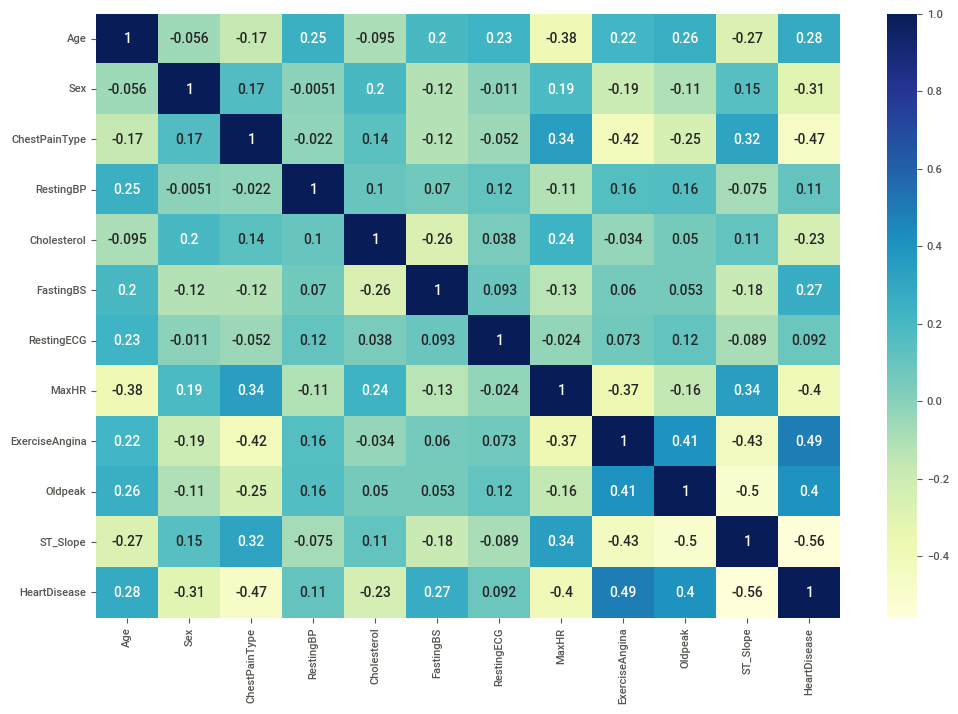

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7ee99a490>,
      dtype=object)

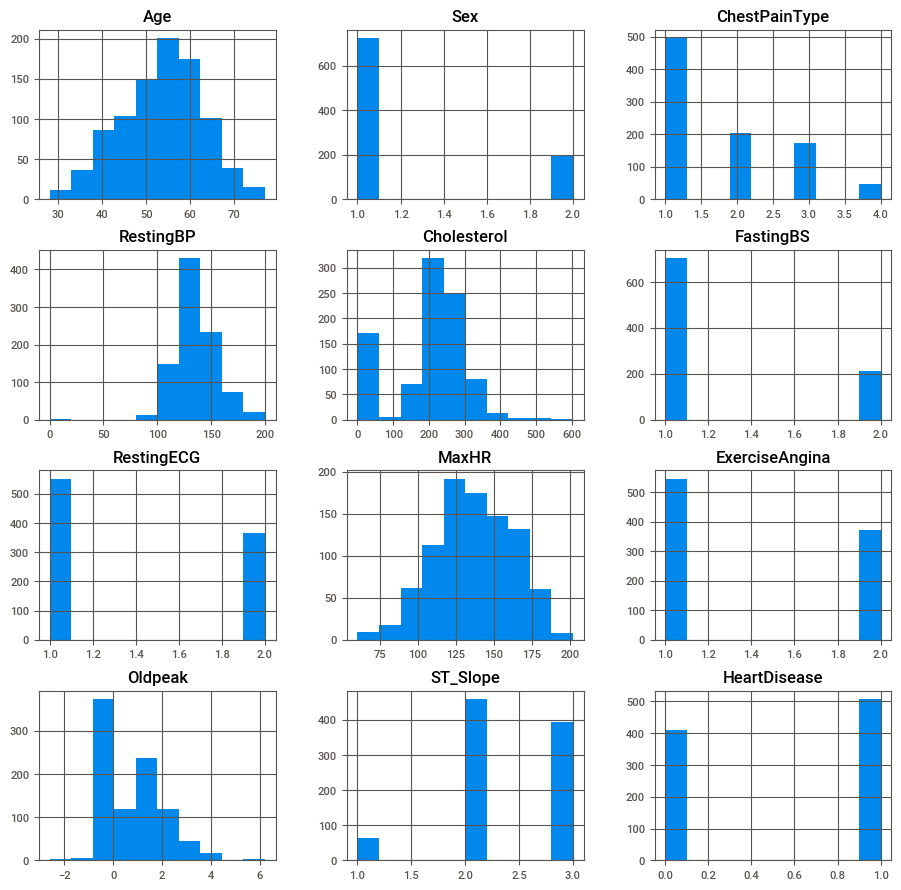

In [ ]:
dataset[dataset.dtypes[(dataset.dtypes=="float64")|(dataset.dtypes=="int64")].index.values].hist(figsize=[11,11])

## X e Y

In [ ]:
filps = {'HeartDisease': 0}
dataset = dataset.fillna(value=filps)

In [ ]:
dataset = dataset.dropna()

In [ ]:
x = dataset.drop('HeartDisease', axis = 1)
y = dataset['HeartDisease']

In [ ]:
print("x =",len(x),"/","y =",len(y),"/","df =",len(dataset))

x = 918 / y = 918 / df = 918


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
393,38,1,1,150,0,2,1,120,2,0.7,2
784,65,1,4,138,282,2,2,174,1,1.4,2
627,44,1,2,140,235,1,2,180,1,0.0,3
818,51,1,1,140,299,1,1,173,2,1.6,3
212,56,1,2,130,276,1,1,128,2,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
346,59,1,1,120,0,1,1,115,1,0.0,2
268,54,1,1,130,242,1,1,91,2,1.0,2
863,60,1,2,140,185,1,2,155,1,3.0,2
771,55,1,1,140,217,1,1,111,2,5.6,1


In [ ]:
y_train

393    1
784    1
627    0
818    1
212    0
      ..
346    1
268    1
863    1
771    1
370    1
Name: HeartDisease, Length: 734, dtype: int64

### MinMax

In [ ]:
scmm = MinMaxScaler()
mm_x_train = scmm.fit_transform(x_train)
mm_x_test = scmm.transform(x_test)

In [ ]:
mm_x_train

array([[0.20408163, 0.        , 0.        , ..., 1.        , 0.375     ,
        0.5       ],
       [0.75510204, 0.        , 1.        , ..., 0.        , 0.45454545,
        0.5       ],
       [0.32653061, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.65306122, 0.        , 0.33333333, ..., 0.        , 0.63636364,
        0.5       ],
       [0.55102041, 0.        , 0.        , ..., 1.        , 0.93181818,
        0.        ],
       [0.65306122, 0.        , 0.        , ..., 1.        , 0.35227273,
        1.        ]])

In [ ]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
393,38,1,1,150,0,2,1,120,2,0.7,2
784,65,1,4,138,282,2,2,174,1,1.4,2
627,44,1,2,140,235,1,2,180,1,0.0,3
818,51,1,1,140,299,1,1,173,2,1.6,3
212,56,1,2,130,276,1,1,128,2,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
346,59,1,1,120,0,1,1,115,1,0.0,2
268,54,1,1,130,242,1,1,91,2,1.0,2
863,60,1,2,140,185,1,2,155,1,3.0,2
771,55,1,1,140,217,1,1,111,2,5.6,1


### StandardScaler

In [ ]:
ssr = StandardScaler()
ssr_x_train = ssr.fit_transform(x_train)
ssr_x_test = ssr.fit_transform(x_test)

In [ ]:
svc = SVC(kernel='linear', C=10.0)
svc.fit(ssr_x_train, y_train)

SVC(C=10.0, kernel='linear')

In [ ]:
ssr_x_train

array([[-1.68291054, -0.53218116, -0.84144702, ...,  1.27703734,
        -0.16163806, -0.61189912],
       [ 1.22814132, -0.53218116,  2.3642041 , ..., -0.78306246,
         0.4928114 , -0.61189912],
       [-1.03601013, -0.53218116,  0.22710335, ..., -0.78306246,
        -0.81608752,  1.03932865],
       ...,
       [ 0.68905764, -0.53218116,  0.22710335, ..., -0.78306246,
         1.98869587, -0.61189912],
       [ 0.14997396, -0.53218116, -0.84144702, ...,  1.27703734,
         4.41950814, -2.2631269 ],
       [ 0.68905764, -0.53218116, -0.84144702, ...,  1.27703734,
        -0.34862362,  1.03932865]])

In [ ]:
ssr_x_test

array([[-1.81139697, -0.45012707,  0.45691802, ..., -1.        ,
        -0.99584345,  1.10503066],
       [ 0.687831  , -0.45012707, -0.66405419, ..., -1.        ,
        -0.80527122,  1.10503066],
       [ 0.98773836, -0.45012707, -0.66405419, ...,  1.        ,
         1.00516492, -0.53469225],
       ...,
       [-0.11192195,  2.22159489,  0.45691802, ..., -1.        ,
        -0.80527122, -0.53469225],
       [ 0.98773836, -0.45012707, -0.66405419, ...,  1.        ,
         1.48159548, -2.17441517],
       [ 0.48789276, -0.45012707, -0.66405419, ...,  1.        ,
         0.05230379, -0.53469225]])

## Regressão logística

### Modelo

In [ ]:
lg_model = LogisticRegression(random_state = 745, max_iter = 1000).fit(x_train, y_train)

### Save Model

In [ ]:
file_lg_model = "LG_Model.pkl"

joblib.dump(lg_model, file_lg_model )

['LG_Model.pkl']

In [ ]:
LG_Model = joblib.load(file_lg_model)

In [ ]:
LG_Model

LogisticRegression(max_iter=1000, random_state=745)

### Predição

Os pontos vermelhos representam os valores previstos que são 1 ou 2,
a linha e o ponto azul representam o valor real do paciente.

In [ ]:
lg_y_pred = lg_model.predict(x_test)

atual = []
predicao = []

for i,j in zip(y_test,lg_y_pred):
  atual.append(i)
  predicao.append(j)
dic = {'Actual':atual,'Prediction':predicao}
lg_heart_result  = pd.DataFrame(dic)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,mode='markers+lines',name='Teste'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=lg_y_pred,mode='markers', name='Predict'))

In [ ]:
lg_heart_result

,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
179,0,1
180,0,1
181,0,0
182,1,1


### Accuracy score

In [ ]:
accuracy_score(y_test, lg_y_pred)

0.8478260869565217

### Classification report

In [ ]:
print(classification_report(y_test,lg_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        73
           1       0.85      0.90      0.88       111

    accuracy                           0.85       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.85      0.85       184



### Confusion matrix

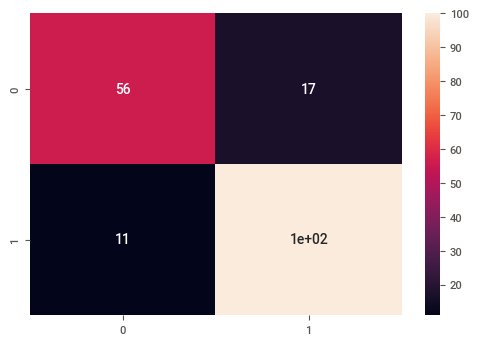

In [ ]:
cm = confusion_matrix(y_test, lg_y_pred)
sns.heatmap(cm, annot = True)

## MLP

### Modelo

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_in = tf.keras.models.Sequential()

model_in.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model_in.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model_in.add(tf.keras.layers.Dense(7, activation='sigmoid'))
model_in.add(tf.keras.layers.Dense(5, activation='sigmoid'))
model_in.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# opt = [tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
#        tf.keras.optimizers.Adamax(learning_rate=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")]
model_in.compile(loss=['binary_crossentropy'],
                 optimizer=tf.keras.optimizers.Adamax(learning_rate=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"),
                 metrics=['accuracy'])

### Treino

In [ ]:
mlp_loss = pd.DataFrame(model_in.fit(x_train, y_train, epochs=200, batch_size=13, verbose=1, validation_split=0.20).history).to_csv("epoch_history.csv")

Epoch 1/200
46/46 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.5417 - val_loss: 0.6963 - val_accuracy: 0.4966
Epoch 2/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5520 - val_loss: 0.6972 - val_accuracy: 0.4966
Epoch 3/200
46/46 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5520 - val_loss: 0.6967 - val_accuracy: 0.4966
Epoch 4/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5520 - val_loss: 0.6957 - val_accuracy: 0.4966
Epoch 5/200
46/46 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5520 - val_loss: 0.6958 - val_accuracy: 0.4966
Epoch 6/200
46/46 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5520 - val_loss: 0.6956 - val_accuracy: 0.4966
Epoch 7/200
46/46 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5520 - val_loss: 0.6936 - val_accuracy: 0.4966
Epoch 8/200
4

### Save model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
 dense_3 (Dense)             (None, 5)                 40        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


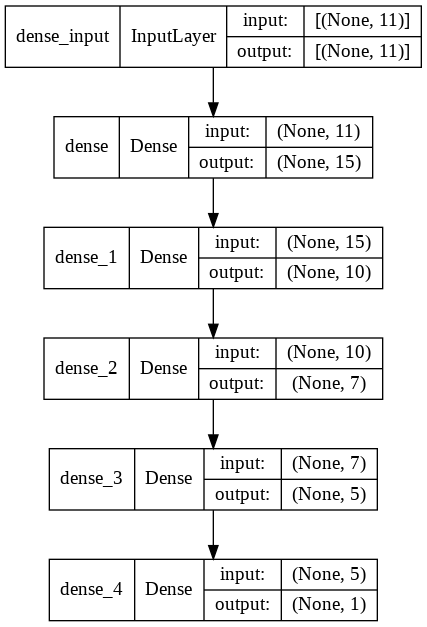

In [ ]:
model_in.summary()
plot_model(model_in,
           to_file='model.png',
           show_shapes=True)

In [ ]:
file_mlp = "MLP_Model.pkl"

joblib.dump(model_in, file_mlp )

INFO:tensorflow:Assets written to: ram://0a0a9270-90a4-4d8d-81e2-7d913e021739/assets


['MLP_Model.pkl']

In [ ]:
MLP_Model = joblib.load(file_mlp)

In [ ]:
MLP_Model

### Epoch history

In [ ]:
mlp_loss = pd.read_csv('/content/epoch_history.csv', sep=',',decimal='.', encoding = 'ISO-8859-1')

In [ ]:
mlp_loss

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,0.690666,0.541738,0.696349,0.496599
1,1,0.687736,0.551959,0.697206,0.496599
2,2,0.687283,0.551959,0.696740,0.496599
3,3,0.687023,0.551959,0.695706,0.496599
4,4,0.685567,0.551959,0.695828,0.496599
...,...,...,...,...,...
195,195,0.436000,0.824531,0.432315,0.843537
196,196,0.435779,0.816014,0.438085,0.836735
197,197,0.431218,0.824531,0.436850,0.843537
198,198,0.433098,0.814310,0.431944,0.843537


### Loss e Accuracy

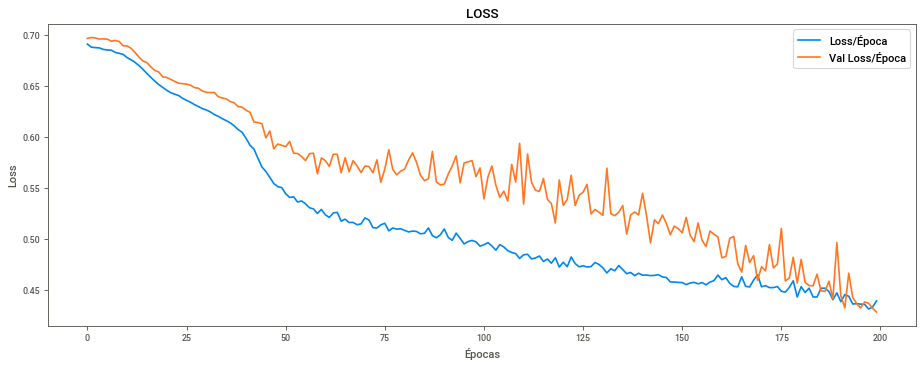

In [ ]:
plt.figure(figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')

plt.title("LOSS")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.plot(mlp_loss['loss'], label="Loss/Época")
plt.plot(mlp_loss['val_loss'], label="Val Loss/Época")

plt.legend()
plt.show()

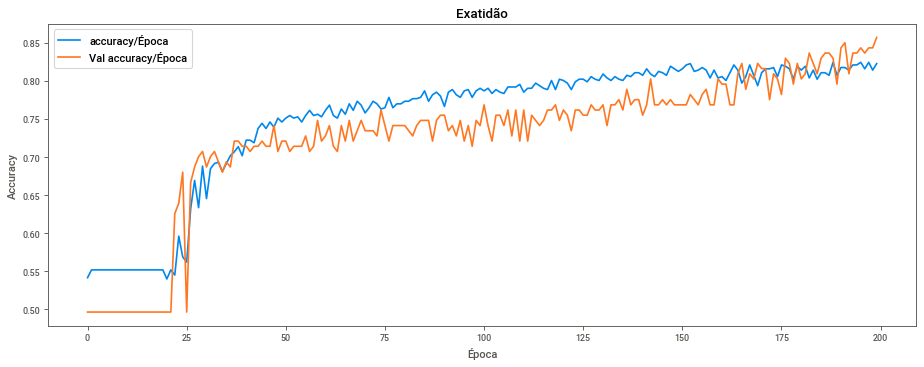

In [ ]:
plt.figure(figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')

plt.title("Exatidão")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(mlp_loss['accuracy'], label="accuracy/Época")
plt.plot(mlp_loss['val_accuracy'], label="Val accuracy/Época")

plt.legend()
plt.show()

In [ ]:
mlp_loss['accuracy'].mean()

0.7521379891037941

### Predição

In [ ]:
cm_y_pred = svc.predict(ssr_x_test)

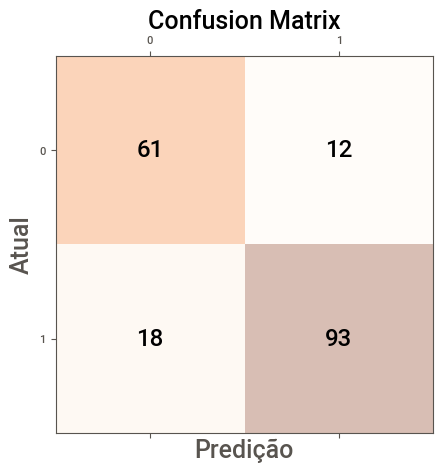

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=cm_y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]): ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predição', fontsize=18)
plt.ylabel('Atual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.show()

In [ ]:
mlp_y_pred = model_in.predict(mm_x_test)

atual = []
predicao = []

for i,j in zip(y_test,lg_y_pred):
  atual.append(i)
  predicao.append(j)
dic = {'Actual':atual,'Prediction':predicao}
mlp_heart_result  = pd.DataFrame(dic)

In [ ]:
mlp_heart_result

,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
179,0,1
180,0,1
181,0,0
182,1,1


In [ ]:
# mlp_y_pred = model_in.predict(mm_x_test)
# real_y_pred = scmm.inverse_transform(mlp_y_pred)
# mlp_y_pred = model_in.predict(mm_x_test)
# mlp_y_pred = scmm.inverse_transform(mlp_y_pred)